In [51]:
import pandas as pd
import numpy as np

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
plt.style.use('seaborn')
# %matplotlib inline

# Matplotlib Scatter Plots

In this section we are going to learn how to create scatter plots in Matplotlib with the **`axes.scatter()`** method.

<div class="alert alert-block alert-info">
<p>You _can_ actually use the `plot()` method we covered in the previous tutorial to generate scatter plots as well.</p>
<p>
But you should generally use the method we are covering in this tutorial unless you are having significant performance problems.
</p>
<p>The reason for this is that the `axes.scatter()` method provides more control over the visualization. It does this at the cost of performance, but this should only be a factor for plots with huge amounts of data points.</p>
</div> 

### Load Necessary Data Set(s)

In [4]:
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


In [5]:
seattle_weather_2015_2016.describe(include="all")

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731,731,731,731,731,731,731
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2,1,1,2,1,2
top,2/3/16,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,No,No,No
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,374,731,731,724,731,731,633,731,728
mean,NaN,51.897811,72.472914,0.148222,0.012709,0.020999,5.611190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.424108,16.488616,0.416315,0.156289,0.218559,2.832489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7.200000,23.200000,0.000000,0.000000,0.000000,0.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,37.900000,61.000000,0.000000,0.000000,0.000000,3.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,54.000000,75.000000,0.000000,0.000000,0.000000,5.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,66.900000,87.100000,0.070000,0.000000,0.000000,6.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scatter Plots
Let's start exploring Matplotlib's **`axes.scatter()`** method's functionality by charting the precipitation records from our dataframe.

### A Simple Line Plot

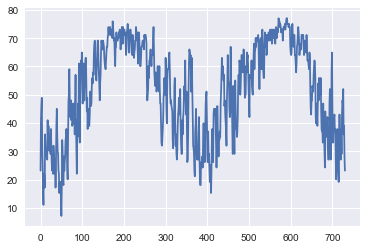

In [6]:
figure, axes = plt.subplots()

axes.plot(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'])

### A Simple Scatter Plot

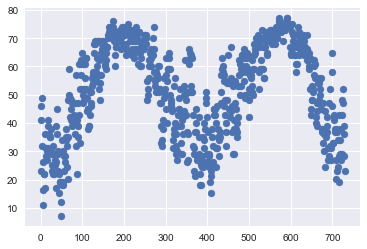

In [7]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'])

#### Adjusting Marker Color(s)
With scatter plots, you can assign a single color to each plot, just like you can with line plots. The only difference here is that you use the **`c`** parameter rather than **`color`**.

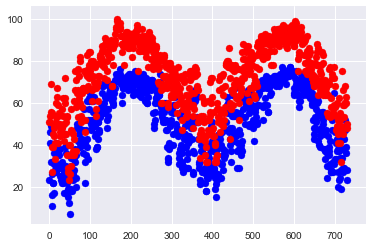

In [9]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c='blue')

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'], 
             color='red')

<div class="alert alert-block alert-info">
<p>Technically, you can use the `color` argument, but if you do, it won't work with the next technique.</p>
</div> 

But you can also assign a unique color to each marker in your plot - which can lead to some very cool and powerful visualizations.

The key here is that you have to use two arguments in combination: 
* **`c`**: Previously, we only used this as a single value argument, but now you have to pass it a list/array that contains a numeric element for each data point in your plot. You have to have the exact same number of elements as plot items or you will get an error.
* **`cmap`**: A valid colormap name. Matplotlib automatically converts all your numeric values in **`c`** to a float between 0 and 1 and then picks the corresponding color out of a given colormap for each marker. There are many different colormaps available. You can see many of the available options in Matplotlib's <a href="https://matplotlib.org/users/colormaps.html" target="_blank">online documentation</a>.

Now let's provide a couple of examples:

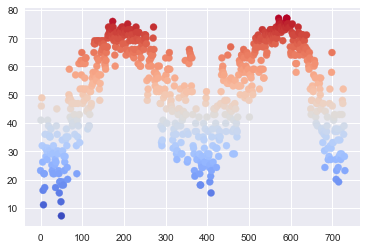

In [11]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
# We will pair our low temp ratings to the colormap
# itself so that low temps will get mapped to one
# end of the colormap and higher temps to the other.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='coolwarm')

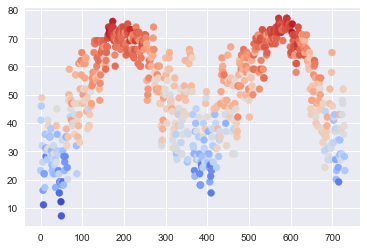

In [12]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
# We will pair our low temp ratings to the colormap
# itself so that low temps will get mapped to one
# end of the colormap and higher temps to the other.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='coolwarm')

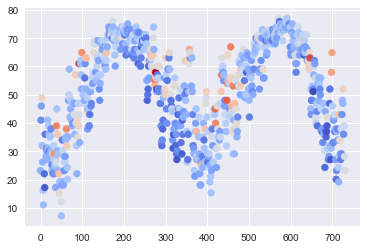

In [13]:
figure, axes = plt.subplots()

# Now for something really cool
# We can pass the average wind speed to the color map
# Now we are tracking two different metrics on the scatter plot
# Is there any coroloation between wind speed and temperature?

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='coolwarm')

#### Adding a Colorbar

<div class="alert alert-block alert-warning">
<p>Adding a colorbar requires interacting with the `figure` object directly. This is the first time that we've done this.</p>
<p>Make sure when you are working on your assignments not to try adding colorbars to the `axes` object or you'll have all sorts of problems.</p>
</div> 

When you have a plot of a continous variable(s) where color is used to signify the values of the variable a colorbar is a great addition to your plot.

To add a colorbar to your plot, you use the **`figure.colorbar()`** method.

The method requires a single argument: an image which has been "painted" onto an *`axes`* object.

It just so happens that when you call the *`axes.scatter`* method, it not only plots such an image, but it also returns a reference to that image.

Up until now, we've just ignored it, but now let's capture it so that we can pass it along to **`figure.colorbar`**:

<class 'matplotlib.collections.PathCollection'>


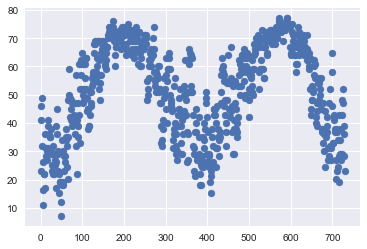

In [14]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'])

print(type(scatter_image))

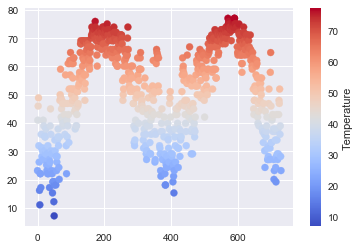

In [15]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='coolwarm')

figure.colorbar(
    scatter_image,
    label='Temperature' # You can also add a label
)

Text(0, 0.5, 'Low Temperature')

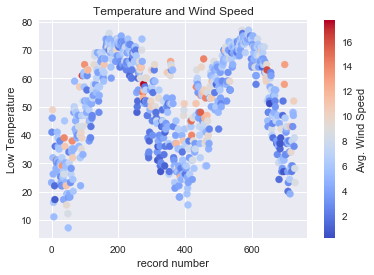

In [16]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='coolwarm')

figure.colorbar(
    scatter_image,
    label='Avg. Wind Speed'
)

axes.set_title("Temperature and Wind Speed")
axes.set_xlabel("record number")
axes.set_ylabel("Low Temperature")

You can also add multiple colorbars:

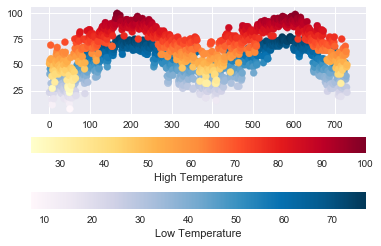

In [19]:
# Plotting high & low temps with different colormaps
# along with separate colorbars
figure, axes = plt.subplots()

low_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

high_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

figure.colorbar(low_temps, label="Low Temperature", orientation = 'horizontal')
figure.colorbar(high_temps, label = "High Temperature", orientation = 'horizontal')

# Activity

### Scatter plot

* Plot a scatter plot for 'avgwindspeed' in the seattle dataset. 
    * Adjust the following parameters for color map based on windspeed
        * c
        * cmap
    * Show a colorbar indicating the mapping of the speed of wind to color. 

In [26]:
# create axes and figure
# plot avg wind speed with a color map and color bar
# set title and labels

# Matplotlib Histograms

In this section, we are going to learn how to create histograms, which are a great way of summarizing data sets.

The basic idea of a histogram is to create "buckets" into which your data points fall into and display those rather than individually displaying all the data points.

In [27]:
nd_football_roster = pd.read_csv('./data/nd-football-2018-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

In [28]:
# Select a style, it will affect all subsequent plots.
# Showing you different style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

## One Dimensional Histograms
Simple, one dimensional histograms are created with the **`axes.hist()`** method.

### A Basic Histogram
This create a basic histogram: you simply have to pass a NumPy array or Pandas series object to it. 

By default, it will create a set of buckets from the values in your array/series along the x-axis and then display how many elements fall in each bucket via the y-axis.

(array([ 4.,  7., 13., 15., 14., 20., 13., 15.,  9.,  6.]),
 array([68. , 69.1, 70.2, 71.3, 72.4, 73.5, 74.6, 75.7, 76.8, 77.9, 79. ]),
 <a list of 10 Patch objects>)

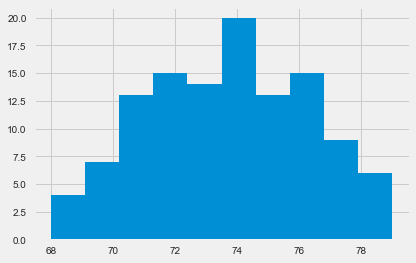

In [29]:
# Create a histogram of ND Football Player Heights
# You can quickly see the most common height bucket
# on the team.
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])

As always, you can adjust the title, label, and legend properties of the **`axes`** object.

Text(0, 0.5, 'Count of Players')

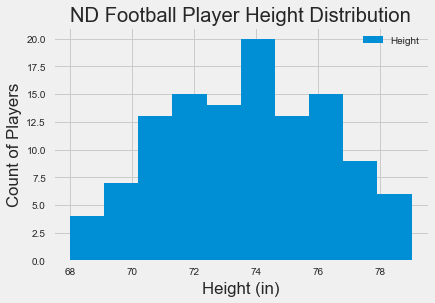

In [30]:
# Adding title, labels, and legend
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'], label="Height")
axes.legend()
axes.set_title('ND Football Player Height Distribution')
axes.set_xlabel('Height (in)')
axes.set_ylabel('Count of Players')

### Customizing Histograms

#### Changing the Number of Bins
Matplotlib tries to guess the number of bins you want for your histograms and it generally does a good job at this. Nonetheless, you may want to increase/decrease the default to adjust the granularity of your plot.

You can do so with the `bins` parameter.

(array([ 1.,  3.,  7., 13., 15., 14., 20., 13., 15.,  9.,  4.,  2.]),
 array([68.        , 68.91666667, 69.83333333, 70.75      , 71.66666667,
        72.58333333, 73.5       , 74.41666667, 75.33333333, 76.25      ,
        77.16666667, 78.08333333, 79.        ]),
 <a list of 12 Patch objects>)

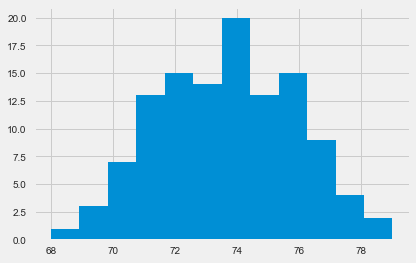

In [31]:
figure, axes = plt.subplots()

# Adjust the number of bins to 15
# The increased granularity will
# expose some heights that aren't represented
# on the team.
axes.hist(nd_football_roster['Height'], bins=12)

#### Changing a Range for Bins
We know that we can use the `axes.set_xlim` and `axes.set_ylim` methods to focus/zoom into one area of a plot.

The **`range`** parameter is somewhat similar functionally to this in that it allows you to specify the range of input values to plot.

The key difference is that when you use the **`range`** parameter, Matplotlib does all the binning/grouping within the range specified.

With `set_xlim`/`set_ylim` you would simply zoom into a smaller area of the plot. This parameter allows you to calculate the histogram with a subset of your data.

Let's demonstrate using our Seattle Weather dataset.

(array([674.,  35.,  17.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.645, 1.29 , 1.935, 2.58 , 3.225, 3.87 , 4.515, 5.16 ,
        5.805, 6.45 ]),
 <a list of 10 Patch objects>)

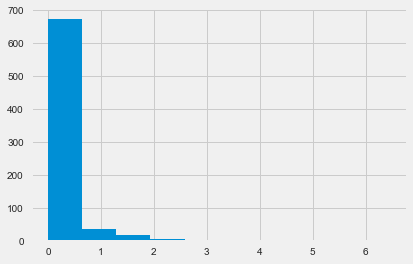

In [32]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])

Because there are so many records with no rain, it skews the chart. If fact, the distortion is so high, that we can't visually make out any records above 2 inches (though we know they must be there because of the bins Matplotlib created).

Let's focus our histogram between .5 and 2.5 inches:

(0.5, 2.5)

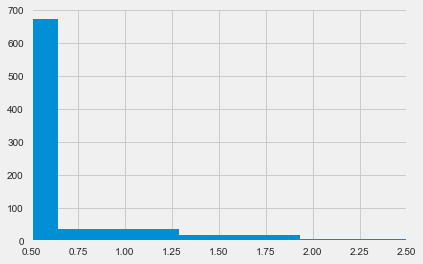

In [37]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])
axes.set_xlim(0.5,2.5)

As you can see above, it did zoom in the range we wanted between 0.5 and 2.5, but the "binning" is still too coarse. **This is why using range parameter rather than set_xlim**

(array([10.,  9.,  7.,  5.,  6.,  3.,  2.,  6.,  2.,  3.,  3.,  4.,  2.,
         2.,  2.,  1.,  1.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
        1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 20 Patch objects>)

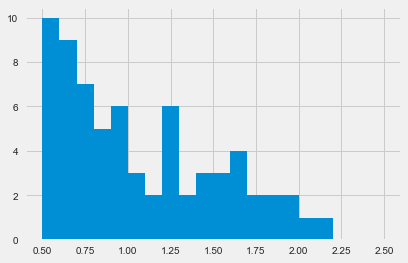

In [38]:
# This will give us a plot of how many
# reasonably, but not extremely, raining days
# Seattle experienced in 2015-2016
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['precipitation'], 
    range=(.5, 2.5), 
    bins=20)

## Activity

### Histograms

* Plot the histogram of the distance ('DISTANCE') travelled by all the flights in the dataset. 
    * Adjust the parameters
        * bins
        * range
        * color

In [65]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [ ]:
# histograms doesn't know how to handle missing data
# so drop missing data


In [ ]:
# create subplots
# plot historgram  with a reasonable range, 20 bins and make it red
# add title, labels and a legend

## Multiple Histograms
Just like we are able to plot multiple lines on a single axes, we can plot multiple histograms. However, visibility can be a real issue.

(array([ 1.,  2.,  5., 12., 24., 24., 42., 37., 39., 32., 46., 45., 43.,
        42., 40., 53., 57., 82., 72., 33.]),
 array([ 7.2 , 10.69, 14.18, 17.67, 21.16, 24.65, 28.14, 31.63, 35.12,
        38.61, 42.1 , 45.59, 49.08, 52.57, 56.06, 59.55, 63.04, 66.53,
        70.02, 73.51, 77.  ]),
 <a list of 20 Patch objects>)

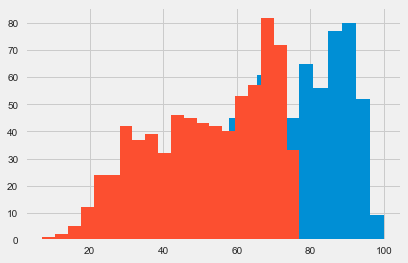

In [39]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20)

That is pretty cool, but there are a number of things that are not ideal with our plot:
1. The low temperatures are in red. 
2. The low temperatures are covering up the high temperatures.
3. There is no legend to clearly deliniate which is which.

Let's combine what we've learned so far about Matplotlib to address these issues.

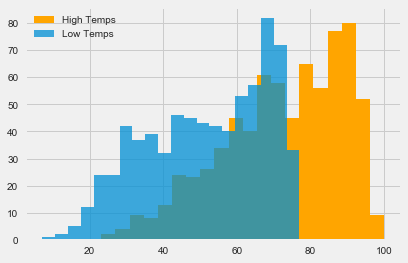

In [42]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange'
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Activity

### Two Histograms

* Create two DataFrames by extracting flight details of 'AS' (Alaskan Airlines) and 'HA' (Hawaiin Airlines)



* Plot the histograms of the distance ('DISTANCE') travelled by each of 'AS' and 'HA' airlines
    * Adjust the parameters for each histogram
        * bins
        * range
        * color
        * alpha (opacity)
        * label
    * Provide a legend on the upper right corner to indicate which airline

In [66]:
# get subsets of data by airline 


Text(0.5, 0, 'Distance')

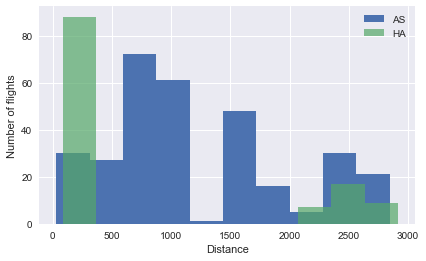

In [73]:
# subplots
# plot both with opacity, color and label
# meta data


## Two Dimensional Histograms

In the previous section, we demonstrated how to generate a histogram on a single variable in a data set. In this section, we are going to cover how you can create 2 dimensional histograms to visualize the relationship between two variables in a data set.

We will start by going back to our ND football roster and create a plot that shows the relationships between player heights and weights.

Text(0, 0.5, 'Weight')

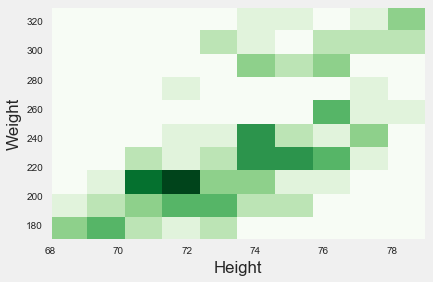

In [44]:
figure, axes = plt.subplots()
image = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='Greens', # Notice we use `cmap` to specify color range
)

axes.set_xlabel("Height")
axes.set_ylabel("Weight")

If you recall from our previous section, we have to pass an image to the *`figure.colorbar()`* method in order for it to work correctly.

Unlike the *`axes.scatter()`* method, the *`axes.hist2d`* method returns a 4 element tuple. The last element is the image reference that we need to pass into *`figure.colorbar()`*. **This is a idiosyncratic thing to keep track**

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'matplotlib.collections.QuadMesh'>


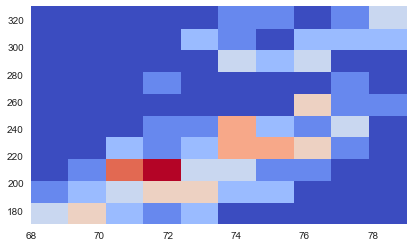

In [90]:
figure, axes = plt.subplots()

results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm')

for i in results: 
    print(type(i))

(array([[3., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 3., 6., 2., 0., 0., 0., 0., 0., 0.],
       [1., 4., 7., 1., 1., 0., 1., 0., 0., 0.],
       [2., 4., 3., 2., 1., 0., 0., 0., 2., 0.],
       [0., 2., 3., 5., 5., 0., 0., 3., 1., 1.],
       [0., 2., 1., 5., 2., 0., 0., 2., 0., 1.],
       [0., 0., 1., 4., 1., 4., 0., 3., 2., 0.],
       [0., 0., 0., 1., 3., 1., 1., 0., 2., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 2., 3.]]), array([68. , 69.1, 70.2, 71.3, 72.4, 73.5, 74.6, 75.7, 76.8, 77.9, 79. ]), array([170., 186., 202., 218., 234., 250., 266., 282., 298., 314., 330.]), <matplotlib.collections.QuadMesh object at 0x7fe040dd8710>)


Text(0, 0.5, 'Weight')

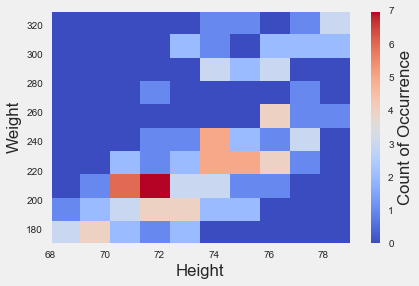

In [45]:
figure, axes = plt.subplots()

results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm')
print(results)
# # Pass in the 4th element (index 3)
figure.colorbar(results[3], label='Count of Occurrence')


axes.set_xlabel("Height")
axes.set_ylabel("Weight")

In [ ]:
results

### Reduce clutter with the `cmin` & `cmax` arguments
In both of our examples, there is a lot of visual noise that comes from the bins that have 0 occurences. We can remove this clutter by specifying the `cmin` (count minimum) argument.

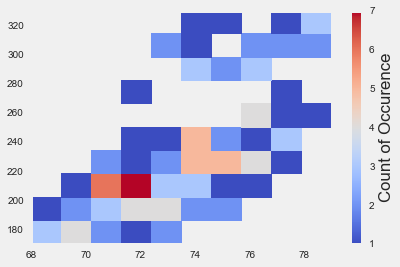

In [46]:
figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='coolwarm',
    cmin=1)
figure.colorbar(results[3], label='Count of Occurence')

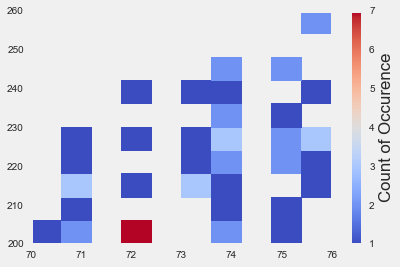

In [47]:
# notice how range works with this type of visualization...

figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='coolwarm',
    cmin=1,
    range=((70,76),(200,260))
    )
figure.colorbar(results[3], label='Count of Occurence')

## Activity

### 2D Histograms

* Plot the 2D histograms of the distance ('DISTANCE') travelled and 'TAXI_IN' time. 
    * Adjust the parameters for each histogram
        * cmin
        * cmap
        * bins
        * range
    * Provide a colorbar for 'Number of flights'

Text(0, 0.5, 'Taxi In Time')

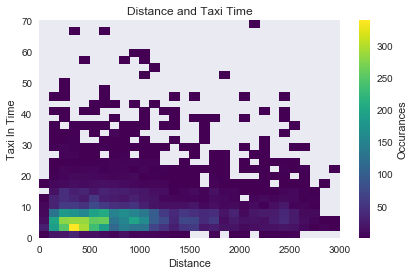

In [106]:
# subplots

# plot 2d histogram with distance and taxi in
# set the cmap to viridis
# clean up the map with range, and cmin/cmax

# add color bar

# set title


# Making Interactive Plots

Instead of saying `%matplotlib inline` if you used **`%matplotlib notebook`** you can interact with your plots. This is makes visualization even more **fun**!

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Add this after your imports to configure Jupyter to 
# display your plots and INTERACT with them
%matplotlib notebook

In [55]:
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


<IPython.core.display.Javascript object>


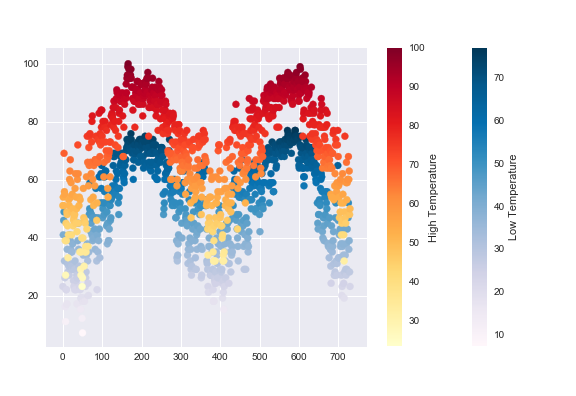

In [56]:
# Plotting high & low temps with different colormaps
# along with separate colorbars
figure, axes = plt.subplots()

low_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

high_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

figure.colorbar(low_temps, label="Low Temperature")
figure.colorbar(high_temps, label = "High Temperature")

# Matplotlib Subplots

## Introduction
In this section we are going to learn how to create multiple plots that are connected to each other in a single *`figure`* object. In Matplotlib, these are called "subplots". You may also think of them as linked plots.

In [57]:
nd_football_roster = pd.read_csv('./data/nd-football-2018-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

## Generating Subplots
You've actually been using the method needed to create a grid of subplots from the very beginning of this chapter.

We've used **`plt.subplots()`** function to return a single figure and axes objects, but it is also capable of generating a grid of axes objects with supplied with the correct arguments.

In the following example, I will generate a 1x2 grid of axes for us to work with.

<class 'numpy.ndarray'>


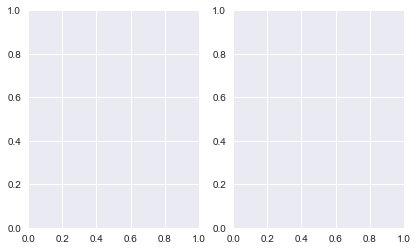

In [58]:
%matplotlib inline
figure, axes = plt.subplots(1, 2)
print(type(axes), axes, sep='\n')

Notice that the *`axes`* variable now points to a Numpy array filled with **`AxesSubplot`** objects. If we attempt to plot something on the *`axes`* variable itself it will fail because a Numpy array can't plot anything!

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

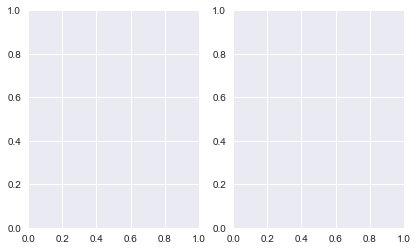

In [59]:
figure, axes = plt.subplots(1, 2)
axes.scatter(nd_football_roster['Height'])

Instead we have to address the specific **`AxesSubplot`** objects inside of the Numpy array that we want to plot with:

Text(0.5, 1.0, 'ND Football Player Weights')

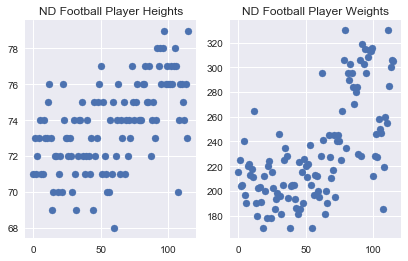

In [60]:
figure, axes = plt.subplots(1, 2)
axes[0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])
axes[0].set_title('ND Football Player Heights')

axes[1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])
axes[1].set_title('ND Football Player Weights')

A potentially confusing case arises when you create a grid with multiple rows as this results in a 2 dimensional Numpy array being returned from the *`plt.subplots()`* method.

When you have this condition, you have to specify both the row and column indices of the *`AxesSubplot`* objects you want to plot with.

In the following example, I will only plot on the top-left and bottom-right subplots to demonstrate.

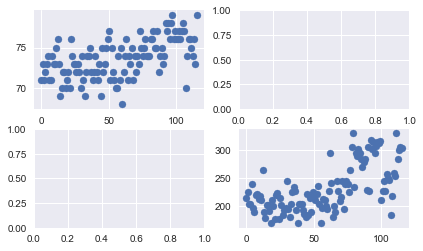

In [61]:
figure, axes = plt.subplots(2, 2)
axes[0, 0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])

axes[1, 1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])

### Sharing X/Y Axis between Subplots
In our examples above, each subplot is given a separate x and y axis. This can become somewhat cluttered as you can see.

The *`plt.subplots()`* method gives use the ability to share x/y axis between multiple subplots via the `sharex` and `sharey` arguments.

Let's show how we might use this with some Seattle weather subplots.

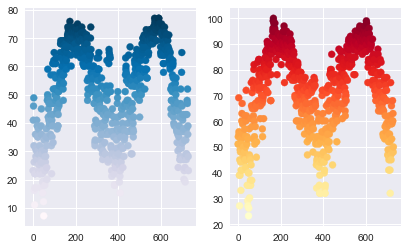

In [62]:
# Here we'll generate two plots
# The low/high temps for Seattle
figure, axes = plt.subplots(1, 2)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Each of the subplots has been given its own x-axis and y-axis. Let's specify that they should share their y-axis and see how that changes the appearance of our figure:

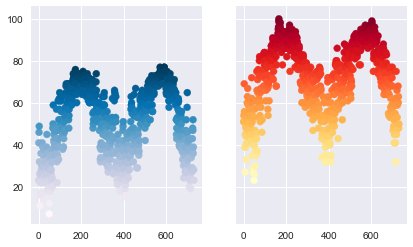

In [63]:
figure, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Very nice. You can see now that there is a single y-axis that is shared between the two subplots. Matplotlib automatically expands the values in the axis to the range necessary to cover the two subplots.

Doing this not only reduced the complexity of the two plots, but also visually aligned the data so that the low temperatures appear lower than the high temperatures.